### 계단함수

In [ ]:
# 계단함수 (넘파이 배열 가능하도록)
import numpy as np

def step_function(x) :
    y = x > 0                   # y : array[False, True, True], dtype=bool
    return y.astype(np.int)     # y : array[0,1,1]

x = np.array([-1.0, 1.0, 2.0])

step_function(x)

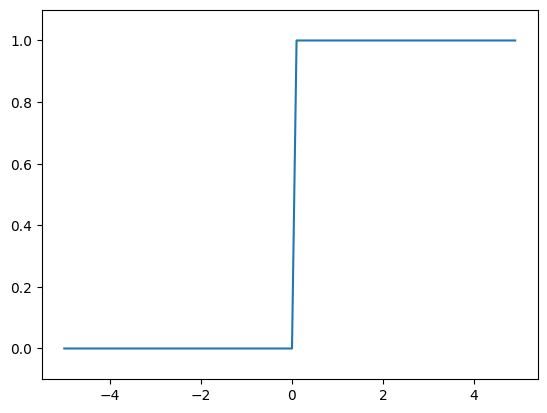

In [3]:
# 계단함수 그래프
import numpy as np
import matplotlib.pylab as plt

def step_function2(x) :
    return np.array(x>0, dtype=np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function2(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

******
### 시그모이드 함수

[0.00669285 0.99330715 0.52497919]


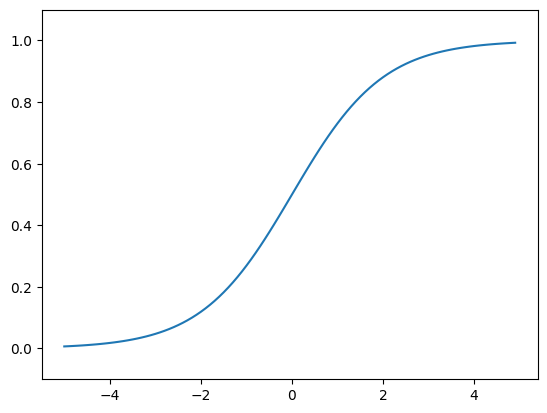

In [8]:
import numpy as np

def sigmoid(x) :
    return 1/(1+np.exp(-x))

x = np.array([-5.0, 5.0, 0.1])
print(sigmoid(x))

x2 = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x2)

# 시그모이드 그래프
plt.plot(x2,y)
plt.ylim(-0.1, 1.1)
plt.show()

****
### ReLU

In [ ]:
def relu(x) :
    return np.maximum(0,x)  # 두 입력 중 큰 값을 선택하여 반환

*****
### 다차원 배열

In [17]:
import numpy as np

A = np.array([1,2,3,4])     # 1차원배열
np.ndim(A)                  # 1
A.shape                     # [4,]
A.shape[0]                  # 4

B = np.array([[1,2],[3,4],[5,6]])
np.ndim(B)
B.shape

(3, 2)

In [20]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

B = np.array([[1,2],[3,4],[5,6]])
B.shape

np.dot(A,B)     # 두 행렬의 곱

array([[19, 22],
       [43, 50]])

In [23]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])

print(A,B)

np.dot(A,B)

[[1 2]
 [3 4]
 [5 6]] [7 8]


array([23, 53, 83])

In [34]:
# 3층 신경망
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
# print(A1)

def sigmoid(x) :
    return 1/(1+np.exp(-x))

Z1 = sigmoid(A1)
# print(Z1)

W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2 

def identity_function(x) : 
    return X

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)
Y = identity_function(A3)       # 또는 Y = A3
Y

array([1. , 0.5])

In [ ]:
import numpy as np

'''
입력층(0층) 2개, 첫 번째 은닉층(1층) 3개, 두 번째 은닉층(2층) 2개, 출력층(3층) 2개의 뉴런으로 구성.
1, 2층의 활성화 함수 : 시그모이드
3층의 활성화 함수 : 항등함수

출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.
예를 들어 회귀에는 항등함수, 2클래스 분류에는 시그모이드 함수,
다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.
'''


# 3.2.4 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# 항등함수
def identity_function(x):
    return x


# 3.4.3 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):        # 다층 퍼셉트론 
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)


****
### 소프트맥스 함수
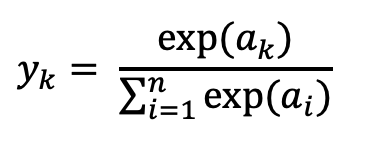

In [37]:
import numpy as np

a = np.array([0.3, 2.9, 4.0])

def softmax(a) :
    exp_a = np.exp(a)
    # print(exp_a)
    sum_exp_a = np.sum(exp_a)       # 지수함수의 합 = 소프트맥스 함수의 분모
    # print(sum_exp_a)
    y = exp_a / sum_exp_a
    # print(y)

    return y

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


#### "오버플로" 문제 발생
- 지수함수에 의해 큰 값이 반환되어 이 값들끼리 나눗셈을 수행하면 결과 수치가 불안정
- 오버플로 : 표현할 수 있는 수의 범위가 한정되어 너무 큰 값을 표현할 수 없음 
- 개선한 수식

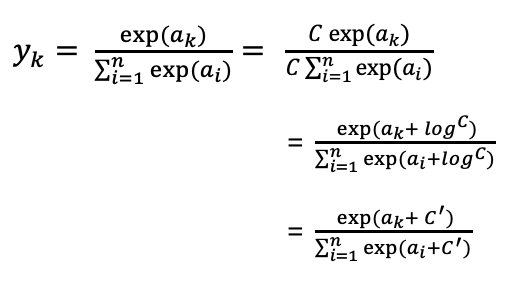

-> 소프트맥스의 지수함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않음

-> 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용

In [48]:
# 오버플로 예방 예시
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))       # 소프트맥스 함수 계산
# 위 계산 결과 : array([nan, nan, nan]) => 제대로 계산되지 않음 (overflow)

c = np.max(a)       # c = 1010(최댓값)
a - c               # array([  0, -10, -20])

np.exp(a-c) / np.sum(np.exp(a-c))   # array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09]) 
# 모든 입력값에서 최댓값을 뺀 후 계산하면 정상적으로 계산됨


# 이를 이용하여 소프트맥스 함수 수정

def softmax_alter(a) : 
    c = np.max(X)
    exp_a = np.exp(a-c)     # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y 

print(softmax_alter(x), np.sum(softmax_alter(x)))
# 소프트맥스 함수의 출력은 0~1 사이의 실수 & 함수 출력의 총합은 1 ****** ==> 출력을 '확률'로 해석 가능


[4.50623236e-05 9.92563729e-01 7.39120826e-03] 1.0000000000000002


C:\Users\USER\AppData\Local\Temp\ipykernel_26292\1426612558.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))       # 소프트맥스 함수 계산
C:\Users\USER\AppData\Local\Temp\ipykernel_26292\1426612558.py:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))       # 소프트맥스 함수 계산


*******************
### 손글씨 숫자 인식

In [1]:
import sys
import os
import pickle
import numpy as np
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


# 3.6.1 MNIST 데이터셋
'''
0~9 숫자 이미지로 구성.
훈련 이미지 60000장, 시험 이미지 10000장
28*28 크기의 회색조 이미지이며 각 픽셀은 0~255의 값을 가짐
레이블은 정답에 해당하는 숫자
'''
# 처음 한 번은 몇 분 정도 걸림
# 이미지를 numpy 배열로 저장
# flatten : 입력 이미지를 평탄화(1차원 배열로)
# normalize : 입력 이미지를 정규화(0.0~1.0 사이의 값으로)
# one_hot_label : 레이블을 원-핫 인코딩 형태로 저장 => 정답을 뜻하는 원소만 1, 나머지는 0
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image                   # Python Image Library 모듈


# 3.6.1 MNIST 이미지 확인해보기

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))                            # 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환
    pil_img.show()


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,         # 1차원 넘파이 배열로 저장
    normalize=False)                                                    # 정규화 실행 x

img = x_train[0]
label = t_train[0]
print(label)  # 5
print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 원래 이미지 모양으로 변형
print(img.shape)  # (28, 28)

img_show(img)


5
(784,)
(28, 28)


In [3]:
# 3.6.2 신경망의 추론 처리
'''
입력층 784개, 출력층 10개,
은닉층 50개, 100개로 구성(임의)
'''


def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0


for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352


Accuracy:0.9352


In [4]:
# 3.6.3 배치 처리
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

Accuracy:1.8704


**********************
QUIZ

In [2]:
# 1. 주어진 np행렬의 곱 코드의 오류를 수정

'''기존코드

import numpy as np

A = np.array([1,2,3,4])
B = np.array([[5,6,7,8],[9,10,11,12]])
print(np.dot(A,B))
'''

### dot(점곱)이 아니라 행렬의 곱 * 을 사용하여 연산한다면 브로드캐스트 작동

# 수정 1 : 연산 행과 열이 4가 되도록

import numpy as np

A = np.array([1,2,3,4])
B = np.array([[5,6],[7,8],[9,10],[11,12]])

print('alter1 : ', np.dot(A,B))


# 수정 2 : 연산 행과 열이 2가 되도록
import numpy as np

A = np.array([1,2],[3,4])
B = np.array([[5,6,7,8],[9,10,11,12]])

print('alter2 : ', np.dot(A,B))

[ 90 100]


In [1]:
# 2. 4차원 신경망 만들기
# 3층 신경망 코드 기반
# w4, b4 추가
# 결과값 지정 x 

import numpy as np

# 3.2.4 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 항등함수
def identity_function(x):
    return x

# 3.4.3 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['W4'] = np.array([[0.5, 0.6], [0.7, 0.8]])              # W4 추가
    
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([0.1, 0.2])
    network['b4'] = np.array([0.2, 0.3])                            # b4 추가

    return network

def forward(network, x):
    W1, W2, W3, W4 = network['W1'], network['W2'], network['W3'], network['W4']     # W4
    b1, b2, b3, b4 = network['b1'], network['b2'], network['b3'], network['b4']     # b4

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    z3 = sigmoid(a3)                    # 3층 신경망의 결과 저장
    a4 = np.dot(z3, W4) + b4            # 이를 추가한 가중치 및 편향값으로 계산
    y = identity_function(a4)           # 4층신경망 결과 도출

    return y

network = init_network()
x = np.array([1.0,0.5])     #  x1 = 1.0 , x2 = 0.5
y = forward(network, x)     # 기존값(3층신경망) = [0.31682708  0.69627909]

print(y)

[0.95642899 1.1810203 ]
